<a href="https://colab.research.google.com/github/TechGio/Obesity/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimation of obesity levels based on eating habits and physical condition Data Set**

Showing the Dataset

In [3]:
import pandas as pd
dataset=pd.read_csv("https://github.com/GioIM/MLDMProject/blob/main/obesity.txt?raw=true")

Data Info (there are not null values)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Separating Inputs from Outputs: we have 16 inputs, 1 output and 2111 istances.

In [6]:
data = dataset.values
X = data[:, :-1].astype(str)
Y = data[:, -1].astype(str)
print('Input', X.shape)
print('Output', Y.shape)

Input (2111, 16)
Output (2111,)


Balanced Distribution of data regarding the obesity levels category, obtained after synthetic data was added.

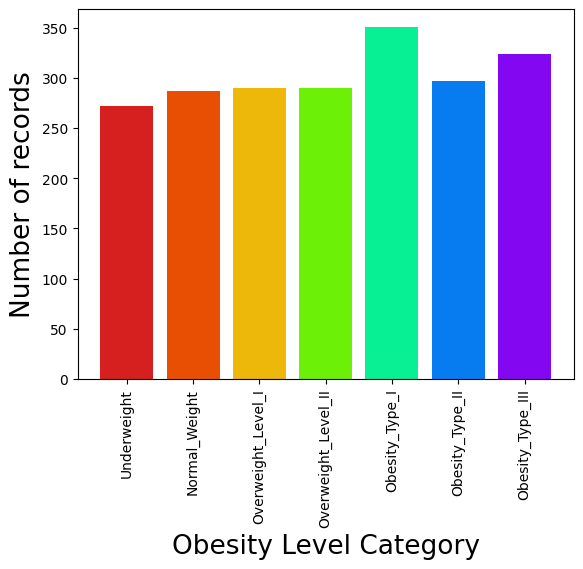

In [7]:
import matplotlib.pyplot as plt
dataBalance = {0: dataset[dataset.NObeyesdad == 'Insufficient_Weight'].shape[0], 1: dataset[dataset.NObeyesdad == 'Normal_Weight'].shape[0], 2: dataset[dataset.NObeyesdad == 'Overweight_Level_I'].shape[0], 3: dataset[dataset.NObeyesdad == 'Overweight_Level_II'].shape[0], 4: dataset[dataset.NObeyesdad == 'Obesity_Type_I'].shape[0], 5: dataset[dataset.NObeyesdad == 'Obesity_Type_II'].shape[0], 6:dataset[dataset.NObeyesdad == 'Obesity_Type_III'].shape[0]}
bar_width = 0.8
plt.bar(0, dataBalance[0], bar_width, color='#d62020')
plt.bar(1, dataBalance[1], bar_width, color='#e84f02')
plt.bar(2, dataBalance[2], bar_width, color='#edb809')
plt.bar(3, dataBalance[3], bar_width, color='#6cf007')
plt.bar(4, dataBalance[4], bar_width, color='#07f093')
plt.bar(5, dataBalance[5], bar_width, color='#077cf0')
plt.bar(6, dataBalance[6], bar_width, color='#8307f0')
plt.xticks([x  for x in dataBalance], ['Underweight', 'Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II', 'Obesity_Type_III'],rotation=90);
plt.xlabel('Obesity Level Category', fontsize=19)
plt.ylabel('Number of records', fontsize=19);

**Preprocessing**: since there are categorical variables preprocessing is needed to transform those variables in numerical ones.

**OrdinalEncoder Transform**

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dfOrdinal=dataset[:].copy()
dfOrdinal=dfOrdinal.loc[:, dfOrdinal.columns != 'NObeyesdad']
dfOrdinal[["Gender","family_history_with_overweight", "FAVC","CAEC","SMOKE", "SCC","CALC","MTRANS"]] = ordinal_encoder.fit_transform(dfOrdinal[["Gender","family_history_with_overweight", "FAVC","CAEC","SMOKE", "SCC","CALC","MTRANS"]])
dfOrdinal = dfOrdinal.rename(columns={'family_history_with_overweight': 'FHWO'})

**OneHotEncoder Transform**

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

onehot_encoder = OneHotEncoder(sparse=False)
dfOneHotTemp=dataset[:].copy()
dfOneHotTemp=dfOneHotTemp[["Gender","family_history_with_overweight", "FAVC","CAEC","SMOKE", "SCC","CALC","MTRANS"]]
dfOneHotTemp= onehot_encoder.fit_transform(dfOneHotTemp)
d1=dataset[["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]]
dfResult=pd.DataFrame(dfOneHotTemp, columns=['Gender1', 'Gender2', 'FHWO1', 'FHWO_2','FAVC1','FAVC2','CAEC1','CAEC2','CAEC3','CAEC4','SMOKE1','SMOKE2','SCC1','SCC2','CALC1','CALC2','CALC3','CALC4','MTRANS1','MTRANS2','MTRANS3','MTRANS4','MTRANS5'])
dfOneHot=pd.concat([d1, dfResult],axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Correlation**

In [10]:
corr_coef=dfOrdinal.corr(method ='pearson')
corr_coef=corr_coef.rename(columns={"family_history_with_overweight":"FHWO"}, index={'family_history_with_overweight': 'FHWO'})
corr_coef.style.background_gradient(cmap='coolwarm')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610
FHWO,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702


We now split the dataset in two for both OrdinalEncoder and OneHotEncoder: **training_set** and **test_set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

trainOrdinal=dfOrdinal.sample(frac=0.8,random_state=200) #random state is a seed value
testOrdinal=dfOrdinal.drop(trainOrdinal.index)

trainOneHot=dfOneHot.sample(frac=0.8,random_state=200) #random state is a seed value
testOneHot=dfOneHot.drop(trainOneHot.index)

label_encoder = LabelEncoder()
y=dataset.loc[:, dataset.columns == 'NObeyesdad']
yTrain=y.sample(frac=0.8,random_state=200) #random state is a seed value
yTest=y.drop(yTrain.index)
yTrainEnc = label_encoder.fit_transform(yTrain)
yTestEnc = label_encoder.fit_transform(yTest)

In [12]:
from graphviz import Source
from sklearn.tree import export_graphviz

import matplotlib as mpl
import matplotlib.pyplot as plt
import os

def show_tree(tree, data):
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)

  # Where to save the figures
  PROJECT_ROOT_DIR = "."
  IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
  os.makedirs(IMAGES_PATH, exist_ok=True)

  def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
      path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
      print("Saving figure", fig_id)
      if tight_layout:
          plt.tight_layout()
      plt.savefig(path, format=fig_extension, dpi=resolution)

  export_graphviz(
          tree,
          out_file=os.path.join(IMAGES_PATH, "obesity.dot"),
          feature_names= list(data.columns.values),
          class_names=['Underweight', 'Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II', 'Obesity_Type_III'],
          rounded=True,
          filled=True
      )

  return Source.from_file(os.path.join(IMAGES_PATH, "obesity.dot"))

**Decision Tree** with **OrdinalEncoder**

Accuracy Score test set: 0.95260663507109


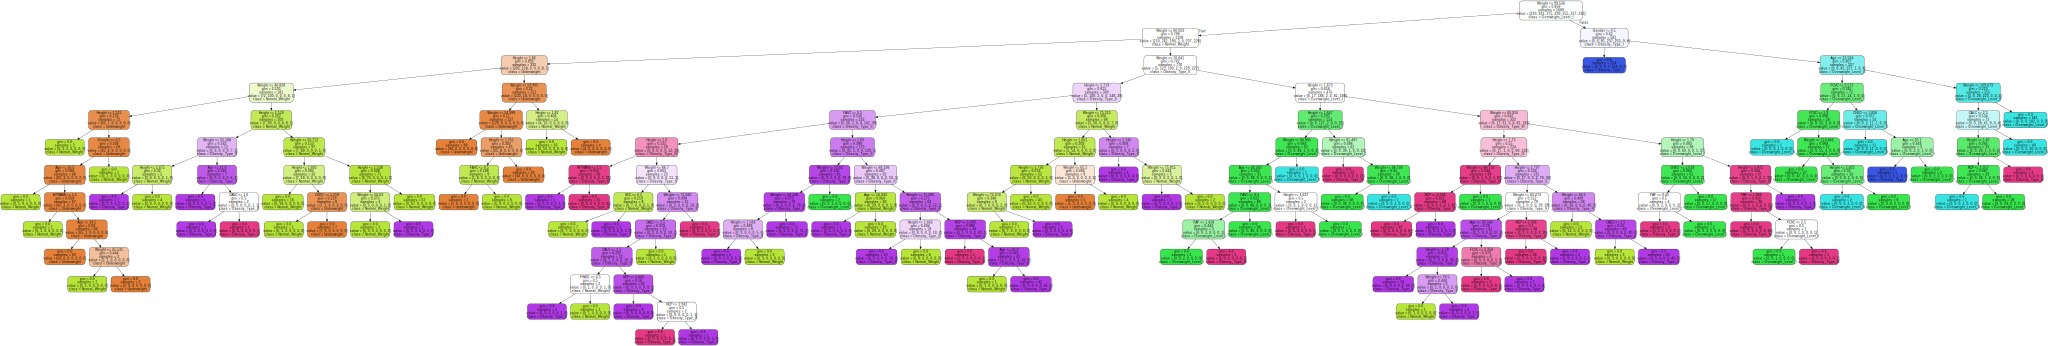

In [13]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score
X_train_ordinal=trainOrdinal.to_numpy()
classifier1 = tree.DecisionTreeClassifier()
classifier1.fit(X_train_ordinal, yTrainEnc)
predict1=classifier1.predict(testOrdinal.to_numpy())
print("Accuracy Score test set: {}". format(accuracy_score(yTestEnc, predict1)))
show_tree(classifier1, trainOrdinal)

**Decision Tree** with **OneHotEncoder**

Accuracy Score test set: 0.957345971563981


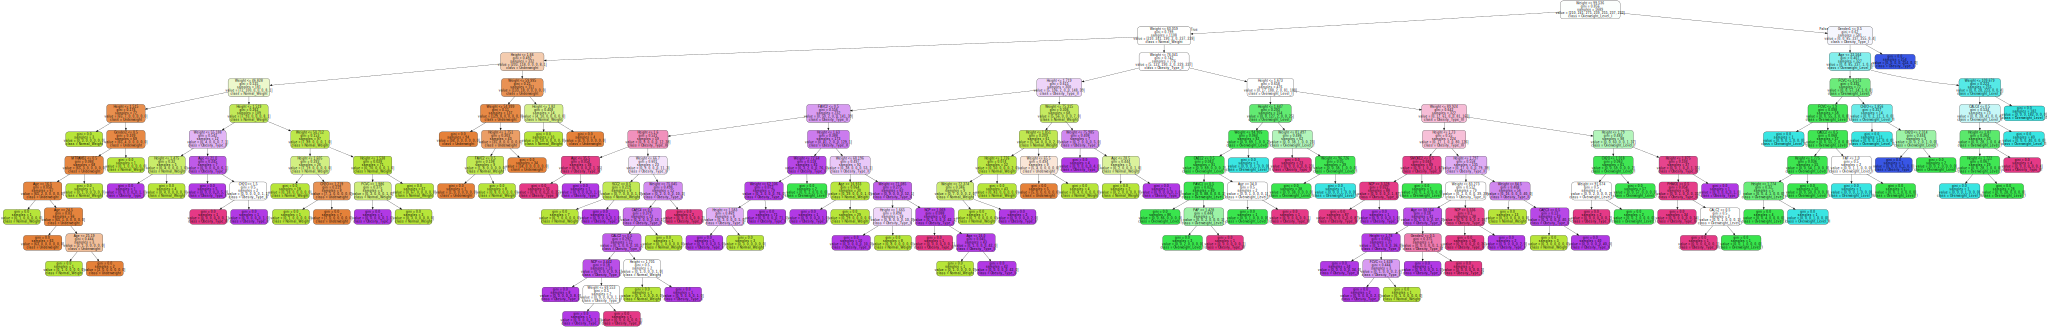

In [14]:
X_train_oneHot=trainOneHot.to_numpy()
classifier2 = tree.DecisionTreeClassifier()
classifier2.fit(X_train_oneHot, yTrainEnc)
predict2=classifier2.predict(testOneHot.to_numpy())
print("Accuracy Score test set: {}". format(accuracy_score(yTestEnc, predict2)))
show_tree(classifier2, trainOneHot)

Evaluating **Accuracy** of Decision Tree with both encoders

> Looking at the code below we notice that we obtain almost the same result, meaning that changing encoder method doesn't affect training that much. By logic we could assert that OneHotEncoder is the better approach since the variables dont have natural order (with Ordinal Encoder we enforce an artificial one), but the result doesn't confirm it.





In [15]:
from sklearn.metrics import accuracy_score

scoreOrdinalEncoder = accuracy_score(yTestEnc, predict1)
scoreOneHotEncoder = accuracy_score(yTestEnc, predict2)
print(scoreOrdinalEncoder)
print(scoreOneHotEncoder)

0.95260663507109
0.957345971563981


**Decision Tree with Hyperparameter Optimization with Ordinal Encoder**

Fitting 10 folds for each of 1386 candidates, totalling 13860 fits
DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=33)
Accuracy Test set 0.933649289099526


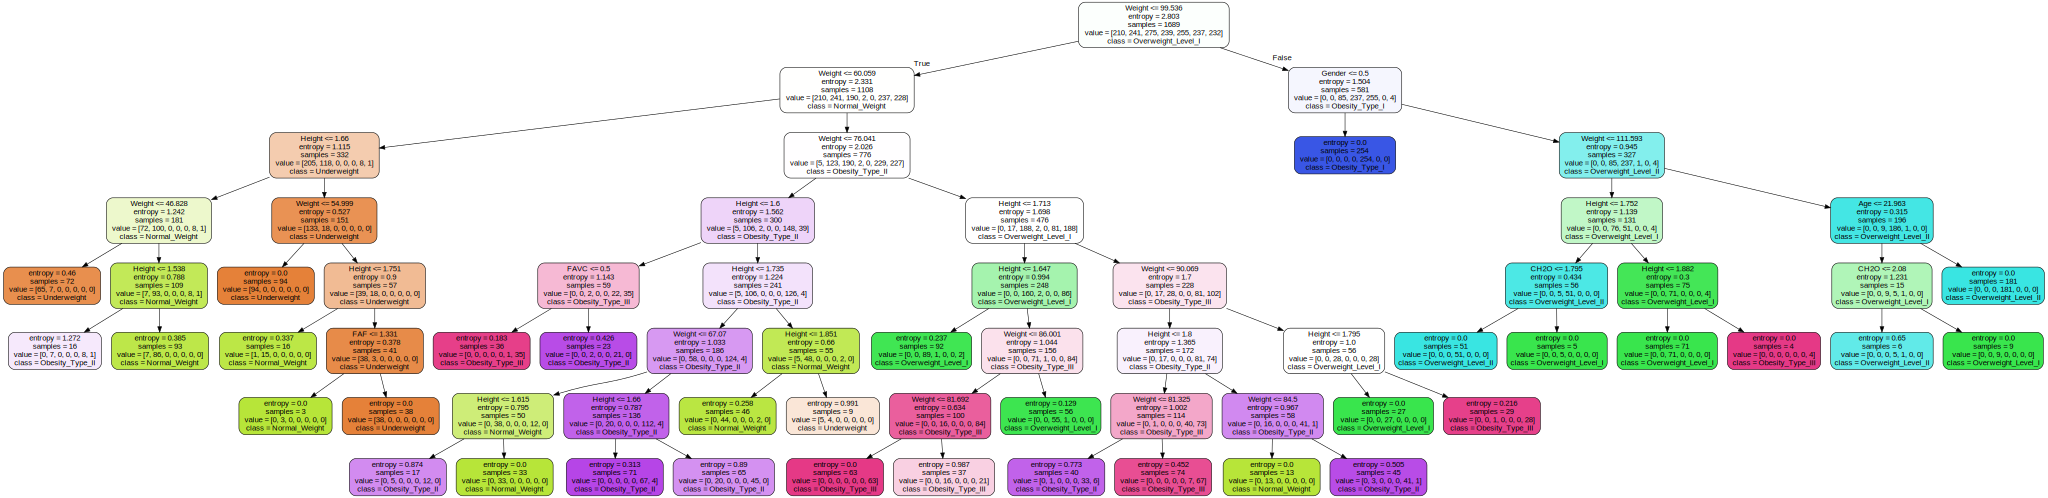

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 35)), 'max_depth':list(range(1,8)), 'min_samples_split': [2,5,10], 'criterion':['gini','entropy']}
grid_search_cv_ordinal = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=10)
grid_search_cv_ordinal.fit(X_train_ordinal, yTrainEnc)

print(grid_search_cv_ordinal.best_estimator_)

predict_tree_Hyperparameter_Ordinal = grid_search_cv_ordinal.best_estimator_.predict(testOrdinal.to_numpy())
print("Accuracy Test set {}" .format(accuracy_score(yTestEnc, predict_tree_Hyperparameter_Ordinal)))

show_tree(grid_search_cv_ordinal.best_estimator_, trainOrdinal)

**Checking for Overfitting max_depth Ordinal Encoder**

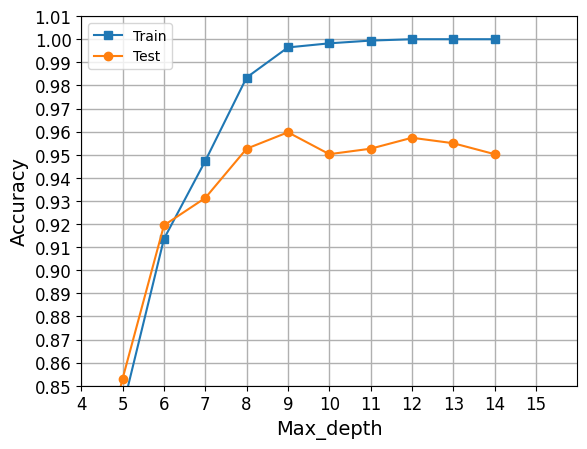

In [17]:
import matplotlib.pyplot as plt

values = [i for i in range(1,15)]
trained_scores=[]
test_scores=[]

for i in values:
  t = DecisionTreeClassifier(max_depth=i)
  t.fit(X_train_ordinal, yTrainEnc)

  y_trained = t.predict(X_train_ordinal)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = t.predict(testOrdinal.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)

plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('Max_depth');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(4,16)
plt.ylim(0.85,1)
plt.yticks(np.arange(0.85, 1.01, 0.01))
plt.xticks(np.arange(4, 16, 1))
plt.legend()
plt.grid(linestyle='-', linewidth=1)
plt.show()

**Checking for Overfitting max_leaf_nodes Ordinal Encoder**

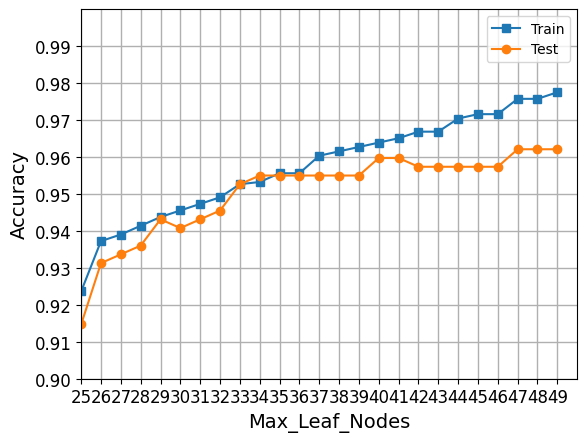

In [18]:
import matplotlib.pyplot as plt

values = [i for i in range(2,50)]
trained_scores=[]
test_scores=[]

for i in values:
  t = DecisionTreeClassifier(max_leaf_nodes=i)
  t.fit(X_train_ordinal, yTrainEnc)

  y_trained = t.predict(X_train_ordinal)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = t.predict(testOrdinal.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)

plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('Max_Leaf_Nodes');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(25,50)
plt.ylim(0.9,1)
plt.yticks(np.arange(0.9, 1, 0.01))
plt.xticks(np.arange(25, 50, 1))
plt.legend()
plt.grid(linestyle='-', linewidth=1)
plt.show()

**Importance of variables**

Most important feature:  Weight
Variable: Weight           Importance: 0.4822
Variable: Height           Importance: 0.2315
Variable: Gender           Importance: 0.1581
Variable: Age              Importance: 0.0452
Variable: FAVC             Importance: 0.0232
Variable: CALC             Importance: 0.0214
Variable: FCVC             Importance: 0.0123
Variable: NCP              Importance: 0.0079
Variable: CAEC             Importance: 0.0055
Variable: CH2O             Importance: 0.005
Variable: FAF              Importance: 0.003
Variable: MTRANS           Importance: 0.0027
Variable: SCC              Importance: 0.0012
Variable: FHWO             Importance: 0.0007
Variable: SMOKE            Importance: 0.0
Variable: TUE              Importance: 0.0


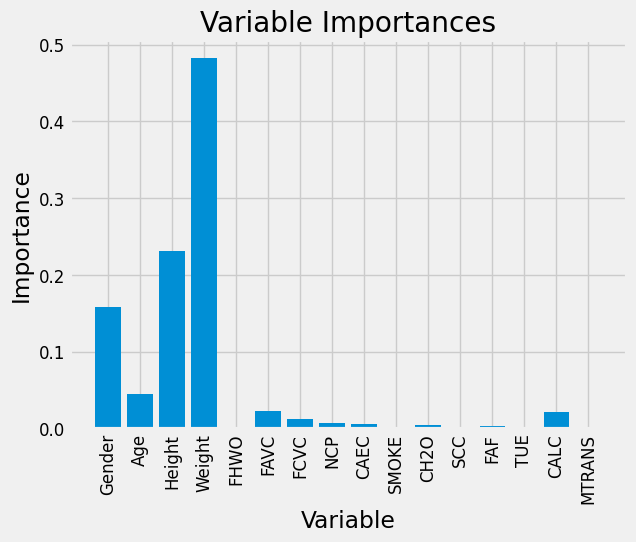

In [19]:
import matplotlib.pyplot as plt

max_feature_importance = max(classifier1.feature_importances_)
print("Most important feature: ", dfOrdinal.columns.values[classifier1.feature_importances_.argmax()])
importances = list(classifier1.feature_importances_)
feature_list = list(dfOrdinal.columns)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# ordino le features per importanza
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:16} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Decision Tree with Hyperparameter Optimization with OneHot Encoder**

Fitting 10 folds for each of 1386 candidates, totalling 13860 fits
DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=34,
                       min_samples_split=5)
Accuracy Test set 0.933649289099526


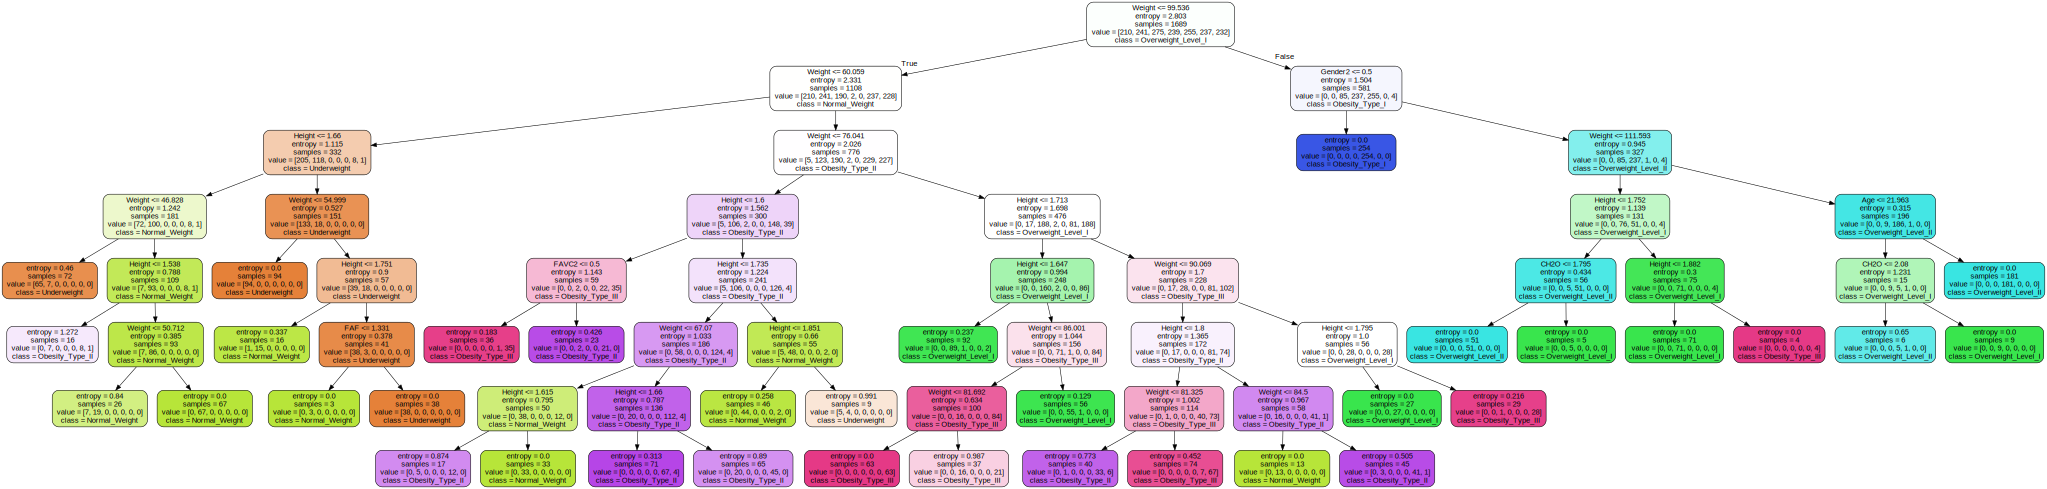

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 35)), 'max_depth':list(range(1,8)), 'min_samples_split': [2,5,10], 'criterion':['gini','entropy']}
grid_search_cv_oneHot = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=10)
grid_search_cv_oneHot.fit(X_train_oneHot, yTrainEnc)

print(grid_search_cv_oneHot.best_estimator_)

predict_tree_Hyperparameter_oneHot = grid_search_cv_oneHot.best_estimator_.predict(testOneHot.to_numpy())
print("Accuracy Test set {}" .format(accuracy_score(yTestEnc, predict_tree_Hyperparameter_oneHot)))

show_tree(grid_search_cv_oneHot.best_estimator_, trainOneHot)

**Checking for Overfitting max_depth OneHot Encoder**

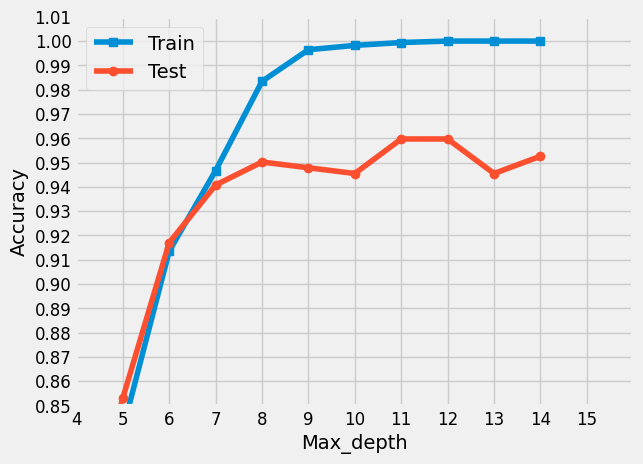

In [21]:
import matplotlib.pyplot as plt

values = [i for i in range(1,15)]
trained_scores=[]
test_scores=[]

for i in values:
  t = DecisionTreeClassifier(max_depth=i)
  t.fit(X_train_oneHot, yTrainEnc)

  y_trained = t.predict(X_train_oneHot)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = t.predict(testOneHot.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)

plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('Max_depth');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(4,16)
plt.ylim(0.85,1)
plt.yticks(np.arange(0.85, 1.01, 0.01))
plt.xticks(np.arange(4, 16, 1))
plt.legend()
plt.grid(linestyle='-', linewidth=1)
plt.show()

**Checking for Overfitting max_leaf_nodes OneHot Encoder**

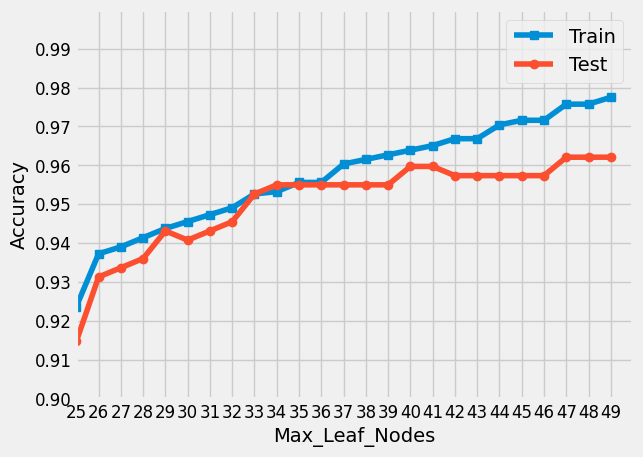

In [22]:
import matplotlib.pyplot as plt

values = [i for i in range(2,50)]
trained_scores=[]
test_scores=[]

for i in values:
  t = DecisionTreeClassifier(max_leaf_nodes=i)
  t.fit(X_train_oneHot, yTrainEnc)

  y_trained = t.predict(X_train_oneHot)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = t.predict(testOneHot.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)

plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('Max_Leaf_Nodes');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(25,50)
plt.ylim(0.9,1)
plt.yticks(np.arange(0.9, 1, 0.01))
plt.xticks(np.arange(25, 50, 1))
plt.legend()
plt.grid(linestyle='-', linewidth=1)
plt.show()

DataFrame with **StandardScaler** (modifing Age, Weight and Height)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfOrdinal_scaled = dfOrdinal[:].copy()
dfOneHot_scaled = dfOneHot[:].copy()
dfOrdinal_scaled[["Age", "Weight", "Height"]] = scaler.fit_transform(dfOrdinal[["Age", "Weight", "Height"]])
dfOneHot_scaled[["Age", "Weight", "Height"]] = scaler.fit_transform(dfOneHot[["Age", "Weight", "Height"]])

#creating train and test set
trainOrdinal_scaled=dfOrdinal_scaled.sample(frac=0.8,random_state=200) #random state is a seed value
testOrdinal_scaled=dfOrdinal_scaled.drop(trainOrdinal_scaled.index)

trainOneHot_scaled=dfOneHot_scaled.sample(frac=0.8,random_state=200) #random state is a seed value
testOneHot_scaled=dfOneHot_scaled.drop(trainOneHot_scaled.index)

X_train_oneHot_scaled=trainOneHot_scaled.to_numpy()
X_train_ordinal_scaled=trainOrdinal_scaled.to_numpy()

**Support Vector Machine** with **OrdinalEncoder** using SVC();



In [24]:
from sklearn import svm

classifier_svc_ordinal = svm.SVC(kernel="linear")
classifier_svc_ordinal.fit(X_train_ordinal, yTrainEnc)
predict_svc_ordinal=classifier_svc_ordinal.predict(testOrdinal.to_numpy())

#scaled
classifier_svc_scaled_ordinal = svm.SVC(kernel="linear")
classifier_svc_scaled_ordinal.fit(X_train_ordinal_scaled, yTrainEnc)
predict_svc_scaled_ordinal=classifier_svc_scaled_ordinal.predict(testOrdinal_scaled.to_numpy())

**Support Vector Machine** with **OneHotEncoder** using SVC()

In [25]:
classifier_svc_oneHot = svm.SVC(kernel="linear")
classifier_svc_oneHot.fit(X_train_oneHot, yTrainEnc)
predict_svc_oneHot=classifier_svc_oneHot.predict(testOneHot.to_numpy())

#scaled
classifier_svc_scaled_oneHot = svm.SVC(kernel="linear")
classifier_svc_scaled_oneHot.fit(X_train_oneHot_scaled, yTrainEnc)
predict_svc_scaled_oneHot=classifier_svc_scaled_oneHot.predict(testOneHot_scaled.to_numpy())

Evaluating **Accuracy** of Support Vector Machine with both encoders


> As we can see there is no difference between the encoder we decide to use. 

> By using non-scaled dataframe we get worse results, thus three features (Age, Weight and Height) have been scaled. With the new scaled dataframe we obtain much better results (accuracy ~ 0.95).





In [26]:
score_svc_ordinal = accuracy_score(yTestEnc, predict_svc_ordinal)
score_svc_oneHot = accuracy_score(yTestEnc, predict_svc_oneHot)
print(score_svc_ordinal)#0.9004739336492891
print(score_svc_oneHot)#0.9052132701421801

#standardized dataset used below
score_svc_scaled_ordinal = accuracy_score(yTestEnc, predict_svc_scaled_ordinal)
score_svc_scaled_oneHot = accuracy_score(yTestEnc, predict_svc_scaled_oneHot)
print(score_svc_scaled_ordinal)#0.9597156398104265
print(score_svc_scaled_oneHot)#0.957345971563981

0.9004739336492891
0.9052132701421801
0.9597156398104265
0.957345971563981


**Overfitting for SVM**

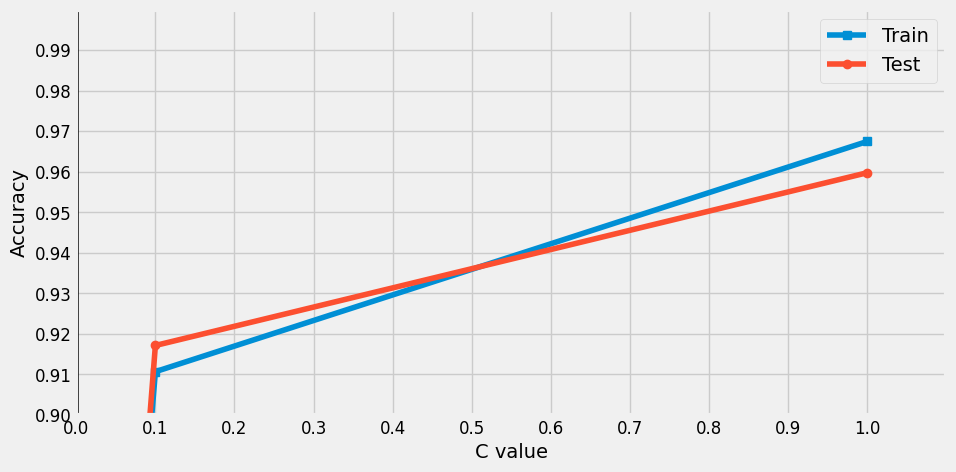

In [27]:
values = [i for i in  [0.001, 0.01, 0.1,1]]
trained_scores=[]
test_scores=[]
fig = plt.figure(figsize = (10,5))

for i in values:
  svc = svm.SVC(C=i, kernel='linear')
  svc.fit(X_train_ordinal_scaled, yTrainEnc)

  y_trained = svc.predict(X_train_ordinal_scaled)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = svc.predict(testOrdinal_scaled.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)


plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('C value');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(0,1.1)
plt.ylim(0.9,1)
plt.yticks(np.arange(0.9, 1, 0.01))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.show()

Defining **val** function

In [28]:
from sklearn import metrics
def val(ordinal, onehot):
  report_neigh_k_ordinal = metrics.classification_report(yTestEnc, ordinal)
  report_neigh_k_oneHot = metrics.classification_report(yTestEnc, onehot)
  print(report_neigh_k_ordinal, "\n", report_neigh_k_oneHot)

**Nearest Neighbors Classification** with k neighbors




In [29]:
from sklearn.neighbors import KNeighborsClassifier

#with OrdinalEncoder_scaled
neigh_k_ordinal_scaled = KNeighborsClassifier()
neigh_k_ordinal_scaled.fit(X_train_ordinal_scaled, yTrainEnc)
predict_neigh_k_ordinal_scaled=neigh_k_ordinal_scaled.predict(testOrdinal_scaled.to_numpy())

#with OneHotEncoder_scaled
neigh_k_oneHot_scaled = KNeighborsClassifier()
neigh_k_oneHot_scaled.fit(X_train_oneHot_scaled, yTrainEnc) 
predict_neigh_k_oneHot_scaled=neigh_k_oneHot_scaled.predict(testOneHot_scaled.to_numpy())

val(predict_neigh_k_ordinal_scaled, predict_neigh_k_oneHot_scaled)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        62
           1       0.85      0.50      0.63        46
           2       0.86      0.93      0.89        76
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        69
           5       0.78      0.75      0.77        53
           6       0.88      0.86      0.87        58

    accuracy                           0.88       422
   macro avg       0.88      0.86      0.86       422
weighted avg       0.88      0.88      0.87       422
 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        62
           1       0.86      0.54      0.67        46
           2       0.90      0.95      0.92        76
           3       0.93      0.97      0.95        58
           4       0.99      1.00      0.99        69
           5       0.77      0.75      0.76        53
           6       0.8

**Nearest Neighbors Classification** with k neighbors **Hyperparameter** **Optimization**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'n_neighbors': [3,5,7,9,11,13,15], 'weights':['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search_cv= GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=10)
grid_search_cv.fit(X_train_ordinal_scaled, yTrainEnc)

print(grid_search_cv.best_estimator_)

predict_KNN_Hyperparameter = grid_search_cv.best_estimator_.predict(testOrdinal_scaled.to_numpy())
print("Accuracy Test set {}" .format(accuracy_score(yTestEnc, predict_KNN_Hyperparameter)))

Fitting 10 folds for each of 28 candidates, totalling 280 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
Accuracy Test set 0.9218009478672986


**Random Forest default** 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_default = RandomForestClassifier()
rf_default.fit(X_train_ordinal_scaled, yTrainEnc)

predict_rf_default = rf_default.predict(testOrdinal_scaled.to_numpy())

print(classification_report(yTestEnc, predict_rf_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.87      1.00      0.93        46
           2       0.99      0.97      0.98        76
           3       0.98      0.97      0.97        58
           4       0.99      1.00      0.99        69
           5       1.00      0.89      0.94        53
           6       0.97      0.97      0.97        58

    accuracy                           0.97       422
   macro avg       0.97      0.97      0.97       422
weighted avg       0.97      0.97      0.97       422



**Random Forest Grid search**

In [ ]:
param= { 
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6],
    'criterion' :['gini', 'entropy']
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, cv= 10)
rf_cv.fit(X_train_ordinal_scaled, yTrainEnc)
predict_rf = rf_cv.predict(testOrdinal_scaled.to_numpy())

print(rf_cv.best_params_)
print(classification_report(yTestEnc, predict_rf))

**Overfitting n_estimators**

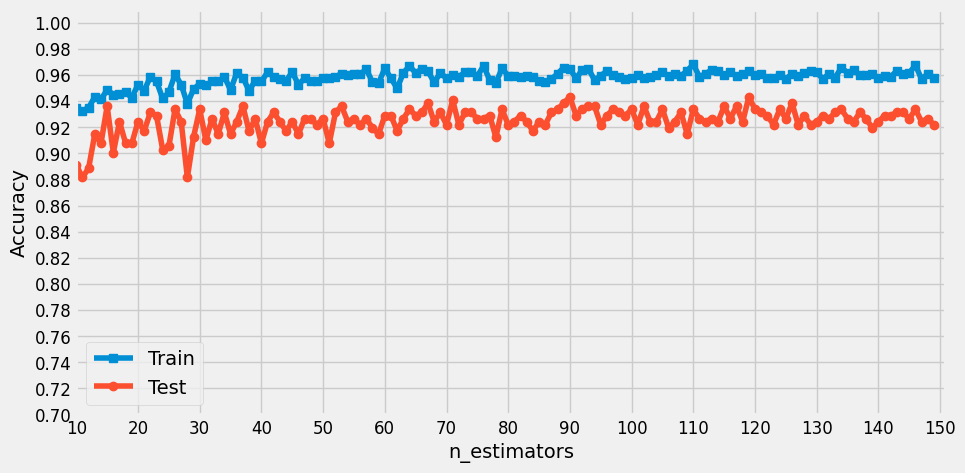

In [33]:
values = [i for i in range(10,150)]
trained_scores=[]
test_scores=[]
fig = plt.figure(figsize = (10,5))

for i in values:
  rf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=6, max_features= 'sqrt')
  rf.fit(X_train_ordinal_scaled, yTrainEnc)

  y_trained = rf.predict(X_train_ordinal_scaled)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = rf.predict(testOrdinal_scaled.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)


plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('n_estimators');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(10,151)
plt.ylim(0.7,1.01)
plt.yticks(np.arange(0.7, 1.01, 0.02))
plt.xticks(np.arange(10, 151, 10))
plt.legend()
plt.show()

**Overfitting max_features**

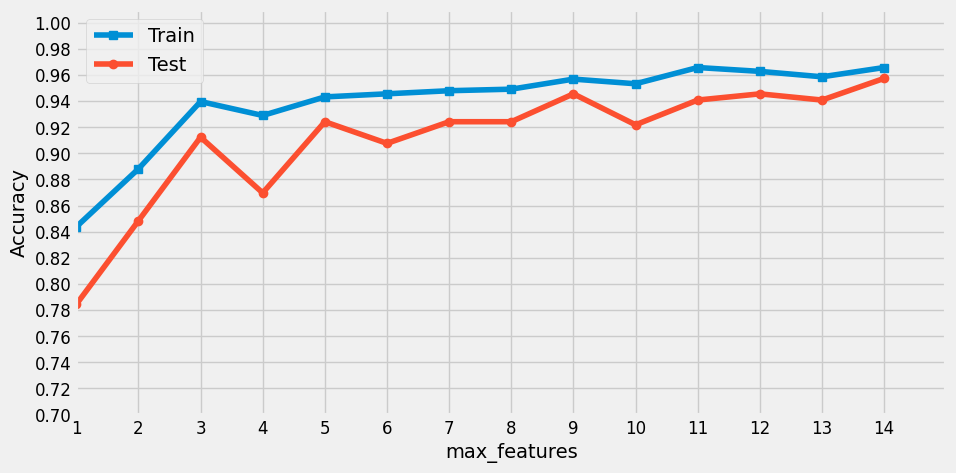

In [34]:
values = [i for i in range(1,15)]
trained_scores=[]
test_scores=[]
fig = plt.figure(figsize = (10,5))

for i in values:
  rf = RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth=6, max_features= i)
  rf.fit(X_train_ordinal_scaled, yTrainEnc)

  y_trained = rf.predict(X_train_ordinal_scaled)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = rf.predict(testOrdinal_scaled.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)


plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('max_features');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(1,15)
plt.ylim(0.7,1.01)
plt.yticks(np.arange(0.7, 1.01, 0.02))
plt.xticks(np.arange(1, 15, 1))
plt.legend()
plt.show()

**Overfitting max_depth**

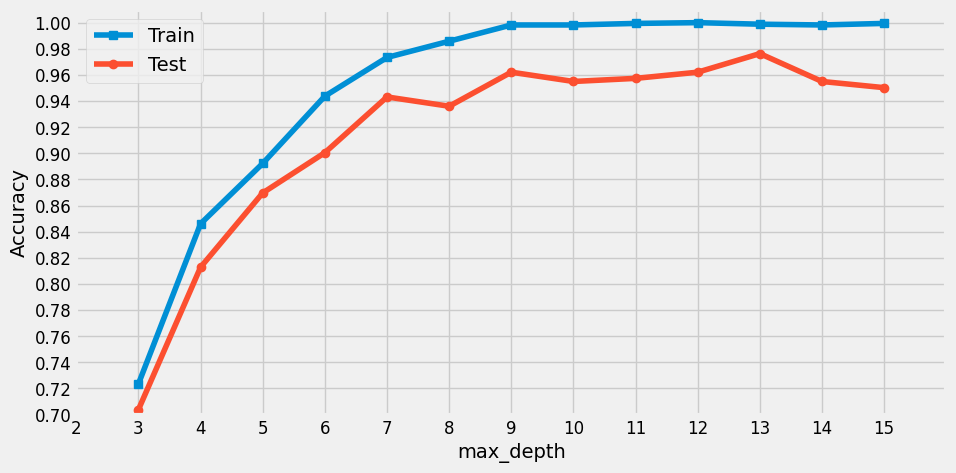

In [35]:
values = [i for i in range(3,16)]
trained_scores=[]
test_scores=[]
fig = plt.figure(figsize = (10,5))

for i in values:
  rf = RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth=i, max_features= 'sqrt')
  rf.fit(X_train_ordinal_scaled, yTrainEnc)

  y_trained = rf.predict(X_train_ordinal_scaled)
  accuracy_trained = accuracy_score(yTrainEnc, y_trained)
  trained_scores.append(accuracy_trained)

  y_pr = rf.predict(testOrdinal_scaled.to_numpy())
  accuracy_test = accuracy_score(yTestEnc, y_pr)
  test_scores.append(accuracy_test)


plt.plot(values, trained_scores, '-s', label="Train")
plt.plot(values, test_scores, '-o', label="Test")
plt.ylabel('Accuracy'); plt.xlabel('max_depth');
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(2,16)
plt.ylim(0.7,1.01)
plt.yticks(np.arange(0.7, 1.01, 0.02))
plt.xticks(np.arange(2, 16, 1))
plt.legend()
plt.show()